<h2>Objective</h2><ul><li> How to download and pre-process the Concrete dataset.</li></ul> <p>Crack detection has vital importance for structural health monitoring and inspection. We would like to train a network to detect Cracks, we will denote the images that contain cracks as positive and images with no cracks as negative. In this lab you are going to have to download the data and study the dataset. There are two questions in this lab, including listing the path to some of the image files as well as plotting a few images. Remember the results as you will be quizzed on them. </p>


<h2>Table of Contents</h2>


<div class="alert alert-block alert-info" style="margin-top: 20px">


<ul>
    <li><a href="#auxiliary"> Imports and Auxiliary Functions </a></li>
    <li><a href="#download_data"> Download data</a></li>
    <li><a href="#examine_files">Examine Files</a></li>
    <li><a href="#Question_1">Question 1 </a></li>
    <li><a href="#Display">Display and Analyze Image With No Cracks    </a></li>
    <li><a href="#Question_2">Question 2 </a></li>
</ul>
<p>Estimated Time Needed: <strong>25 min</strong></p>
 </div>
<hr>


<h2 id="auxiliary">Imports and Auxiliary Functions</h2>


The following are the libraries we are going to use for this lab:


In [ ]:
!pip install skillsnetwork

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.7 MB/s eta 0:00:00


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import imshow
import os
import glob
import skillsnetwork

In [ ]:
def show_data(data_sample, shape=(28, 28)):
  plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
  plt.title('y = ' + data_sample[1])

<h2 id="download_data">Download Data</h2>


In this section, you are going to download the data from IBM object storage using **skillsnetwork.prepare** command. <b>skillsnetwork.prepare</b> is a command that's used to download a zip file, unzip it and store it in a specified directory. Locally we store the data in the directory  **/content/sample_data**.


In [ ]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", path = "/content/sample_data", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to 'sample_data'


<h2 id="examine_files">Examine Files </h2>


In this section we are going to get a list of the negative image files, then plot them. Then for the first question your job to do something similar to the positive files.


In [ ]:
directory = "/content/sample_data"
negative = "Negative"

In [ ]:
negative_files_path = os.path.join(directory, negative)
negative_files_path

'/content/sample_data/Negative'

<h3> Loading the File Path of Each Image </h3>


In [ ]:
os.listdir(negative_files_path)[0:3]

['08099.jpg', '03347.jpg', '04720.jpg']

In [ ]:
[os.path.join(negative_files_path, file) for file in os.listdir(negative_files_path)][0:3]

['/content/sample_data/Negative/08099.jpg',
 '/content/sample_data/Negative/03347.jpg',
 '/content/sample_data/Negative/04720.jpg']

In some cases, we may have files of a different type, so we have to ensure it's of type <b>jpg</b>. We have to check the extension using the method <code> endswith()</code>. The method  <code>endswith()</code> returns True if the string ends with the specified suffix, otherwise, it will return False. Let's do a quick example:


In [ ]:
print("test.jpg".endswith("jpg"))
print("test.mpg".endswith("jpg"))

True
False


We now have all the tools to create a list with the path to each image file.  We use a List Comprehensions  to make the code more compact. We assign it to the variable <code>negative_files<code> , sort it in and display the first three elements:


In [ ]:
negative_files = [os.path.join(negative_files_path, file) for file in os.listdir(negative_files_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[:3]

['/content/sample_data/Negative/00001.jpg',
 '/content/sample_data/Negative/00002.jpg',
 '/content/sample_data/Negative/00003.jpg']



<h2 id="Question_1">Question 1</h2>


<b>Using the procedure above, load all the images with cracks paths into a list called positive files, the directory of these images is called Positive.  Make sure the list is sorted and display the first three elements of the list you will need this for the question so remember it.</b>


In [ ]:
file_path = "/content/sample_data"
positive = "Positive"
positive_files_path = os.path.join(file_path, positive)
positive_files_path

'/content/sample_data/Positive'

In [ ]:
positive_files = [os.path.join(positive_files_path, file) for file in os.listdir(positive_files_path) if file.endswith(".jpg")]
positive_files.sort()
positive_files[:3]

['/content/sample_data/Positive/00001.jpg',
 '/content/sample_data/Positive/00002.jpg',
 '/content/sample_data/Positive/00003.jpg']

<h2 id="Display">Display and Analyze Image With No Cracks</h2>


We can open an image by using the <code>Image</code> Module in the  <b>PIL</b> library, using the function open. We only require the image path; the input is the path of the image. For example we can load the first image as follows:


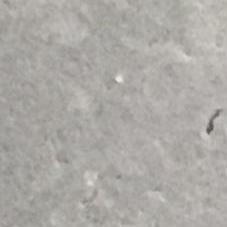

In [ ]:
image1 = Image.open(negative_files[0])
image1

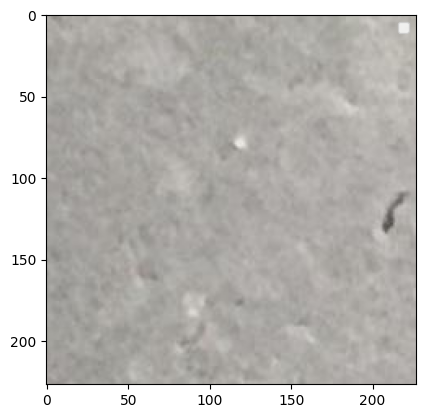

In [ ]:
plt.imshow(image1)
plt.legend("1st Image with no Cracks")
plt.show()

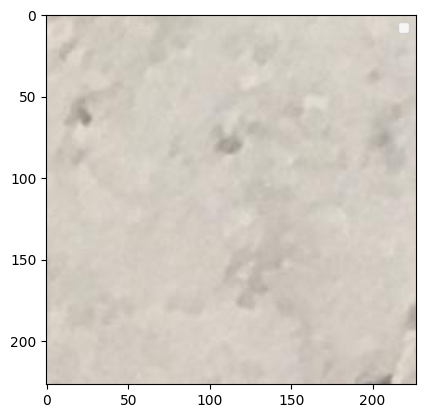

In [ ]:
image2 = Image.open(negative_files[1])
plt.imshow(image2)
plt.legend("2nd Image with no Crack")
plt.show()

<h2 id="Question_2">Question 2</h2>


<b>Plot the first three images for the dataset with cracks. Don't forget. You will be asked in the quiz, so remember the image. </b>


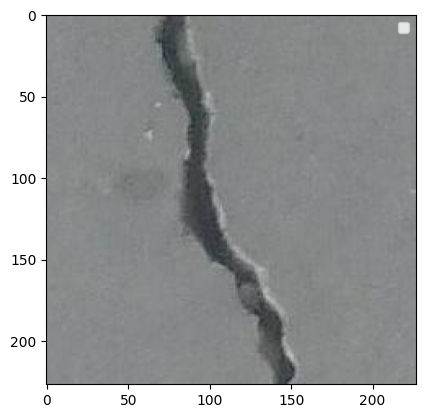

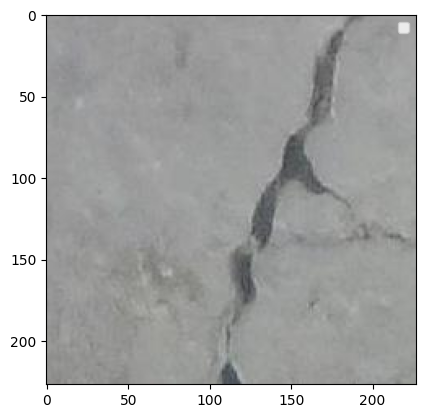

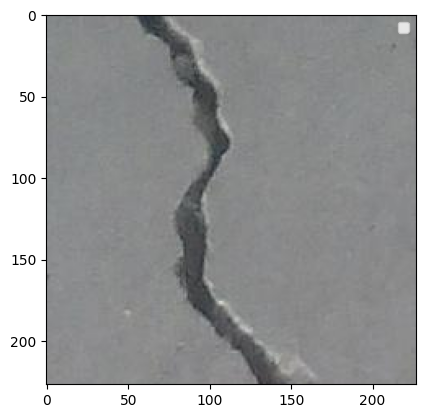

In [ ]:
for i in range(3):
    image = Image.open(positive_files[i])
    plt.imshow(image)
    plt.legend(f"{i}th image with crack")
    plt.show()

<h1>Data Preparation with PyTorch</h1>


<p>Crack detection has vital importance for structural health monitoring and inspection. We would like to train a network to detect Cracks, we will denote the images that contain cracks as positive and images with no cracks as negative.  In this lab you are going to have to build a dataset object. There are five questions in this lab, Including some questions that are intermediate steps to help you build the dataset object. You are going to have to remember the output for some  of the questions. </p>


<h2 id="Question_1">Question 1</h2>
<b>Find the <b>combined</b> length of the list <code>positive_files</code> and <code>negative_files</code> using the function <code>len</code> . Then assign  it to the variable <code>number_of_samples</code></b>


In [ ]:
number_of_samples = len(positive_files) + len(negative_files)
number_of_samples

40000

<h2 id="assign_labels">Assign Labels to Images </h2>


In this section we will assign a label to each image in this case we  can assign the positive images, i.e images with a crack to a value one  and the negative images i.e images with out a crack to a value of zero <b>Y</b>. First we create a tensor or vector of zeros, each element corresponds to a new sample. The length of the tensor is equal to the number of samples.


In [ ]:
import torch
from torch.utils.data import dataset
Y = torch.zeros(number_of_samples)

In [ ]:
Y = Y.type(torch.LongTensor)
Y.type()

'torch.LongTensor'

With respect to each element we will set the even elements to class one and the odd elements to class zero.


In [ ]:
Y[::2] = 1
Y[1::2] = 0

In [ ]:
print(Y)

tensor([1, 0, 1,  ..., 0, 1, 0])


<h2 id="Question_2">Question 2</h2>
<b>Create a list all_files such that the even indexes contain the path to images with positive or cracked samples and the odd element contain the negative images or images with out cracks. Then use the following code to print out the first four samples.</b>


In [ ]:
all_files = []
pos_index = 0
neg_index = 0

for i in range(number_of_samples):
  if(i%2 == 0):
    all_files.append(positive_files[pos_index])
    pos_index += 1
  else:
    all_files.append(negative_files[neg_index])
    neg_index += 1

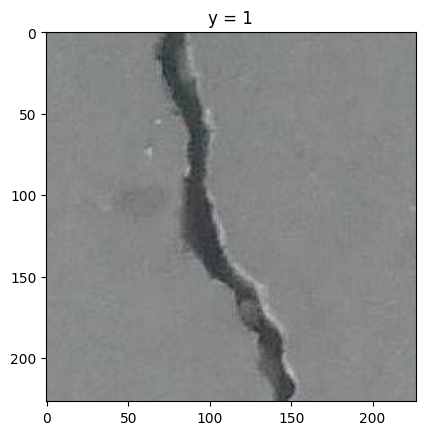

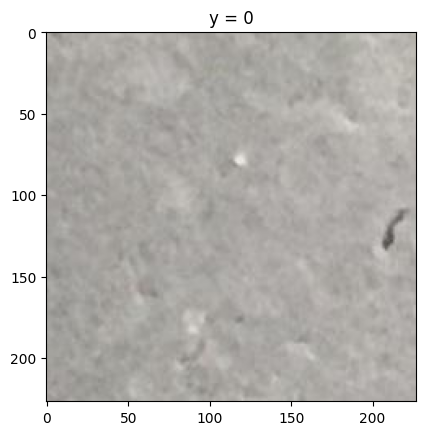

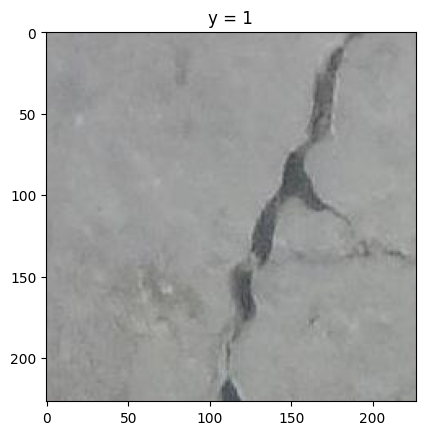

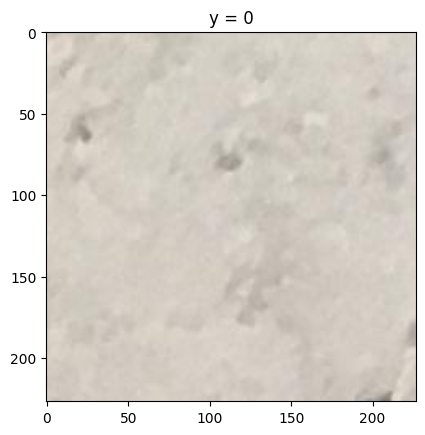

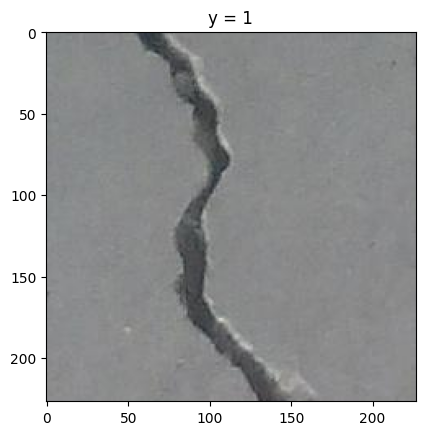

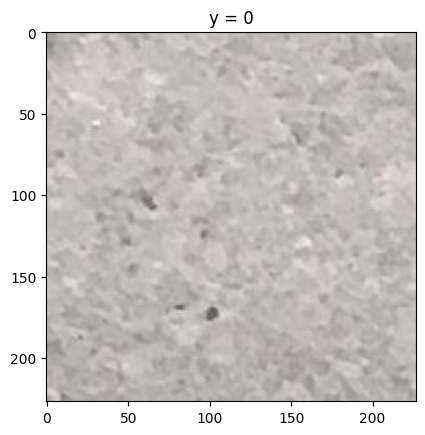

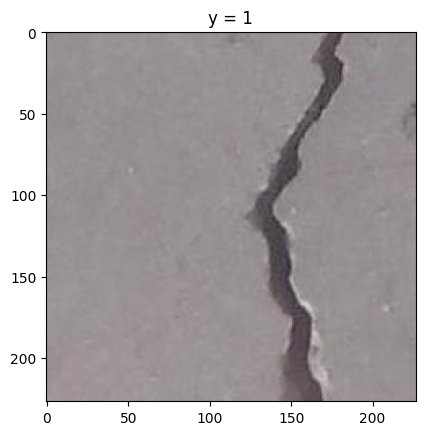

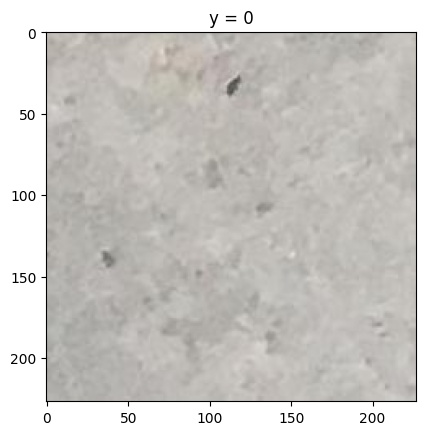

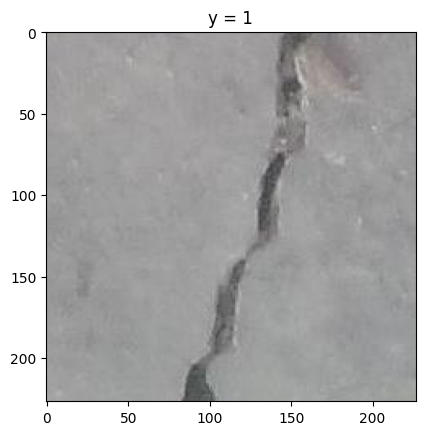

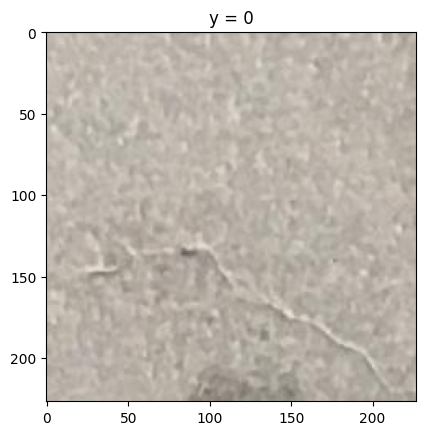

In [ ]:
for y, file in zip(Y[0:10], all_files[0:10]):
  plt.imshow(Image.open(file))
  plt.title('y = ' + str(y.item()))
  plt.show()

<h2 id="split">Training  and Validation  Split  </h2>
When training the model we  split up our data into training and validation data. It If the variable train is set to <code>True</code>  the following lines of code will segment the  tensor <b>Y</b> such at  the first 30000 samples are used for training. If the variable train is set to <code>False</code> the remainder of the samples will be used for validation data.


In [ ]:
# train = False

# if train:
#   all_files = all_files[0:30000]
#   Y = Y[0:30000]

# else:
#   all_files = all_files[30000:]
#   Y = Y[30000:]

<h2 id="Question_3">Question 3</h2>
Modify the above lines of code such that if the variable <code>train</code> is set to <c>True</c> the first 30000 samples of all_files are use in training. If <code>train</code> is set to <code>False</code> the remaining  samples are used for validation. In both cases reassign  the values to the variable all_files, then use the following lines of code to print out the first four validation sample images.


In [ ]:
def train_test_split(Y, all_files, train = True):
  tv_all_files = []
  tv_Y = []

  if train:
    tv_all_files = all_files[0:30000]
    tv_Y = Y[0:30000]

  else:
    tv_all_files = all_files[30000:]
    tv_Y = Y[30000:]

  print(len(tv_all_files))
  print(len(tv_Y))

  return tv_all_files, tv_Y

tv_all_files, tv_Y = train_test_split(Y, all_files, train=False)

10000
10000


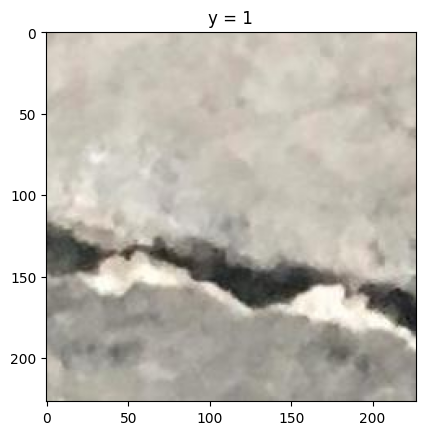

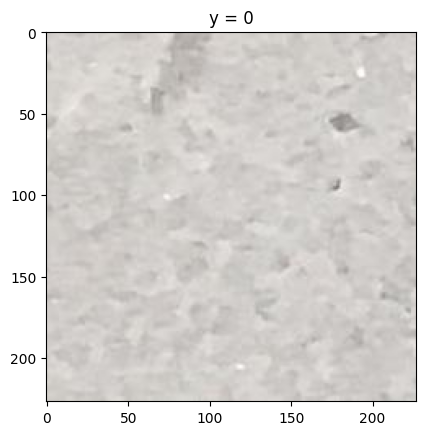

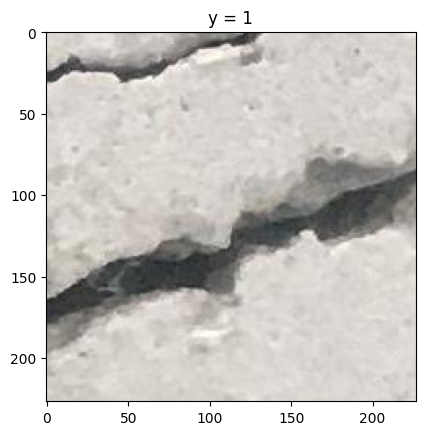

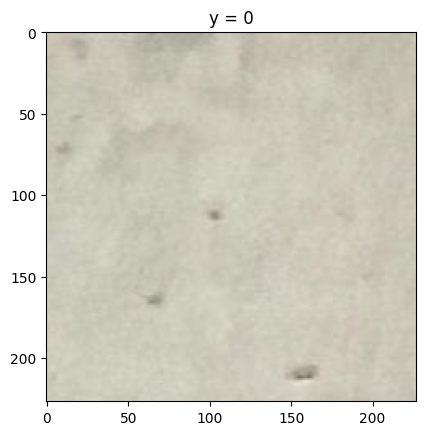

In [ ]:
for y, file in zip(tv_Y[0:4], tv_all_files[0:4]):
  plt.imshow(Image.open(file))
  plt.title("y = " + str(y.item()))
  plt.show()

<h2 id="data_class">Create a Dataset Class</h2>


In this section, we will use the previous code to build a dataset class.



Complete the code to build a Dataset class <code>dataset</code>. As before, make sure the even samples are positive, and the odd samples are negative.  If the parameter <code>train</code> is set to <code>True</code>, use the first 30 000  samples as training data; otherwise, the remaining samples will be used as validation data.  


In [ ]:
from torch.utils.data import Dataset
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
      directory="/content/sample_data"
      positive="Positive"
      negative="Negative"

      positive_file_path=os.path.join(directory,positive)
      negative_file_path=os.path.join(directory,negative)
      positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
      positive_files.sort()
      negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
      negative_files.sort()

      self.all_files=[None]*number_of_samples
      self.all_files[::2]=positive_files
      self.all_files[1::2]=negative_files
      # The transform is goint to be used on image
      self.transform = transform
      #torch.LongTensor
      self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
      self.Y[::2]=1
      self.Y[1::2]=0

      if train:
        self.Y=self.Y[0:30000]
        self.all_files = self.all_files[0:300000]
        self.len=len(self.all_files)

      else:
        self.Y=self.Y[30000:]
        self.all_files = self.all_files[300000:]
        self.len=len(self.all_files)

    # Get the length
    def __len__(self):
      return self.len

    # Getter
    def __getitem__(self, idx):
      image=Image.open(self.all_files[idx])
      y=self.Y[idx]

      # If there is any transform method, apply it onto the image
      if self.transform:
          image = self.transform(image)
      return image, y

<h2 id="Question_4">Question 4</h2>
<b>Create a Dataset object <code>dataset</code> for the training data, use the following lines of code to print out sample the 10th and  sample 100 (remember zero indexing)  </b>


40000


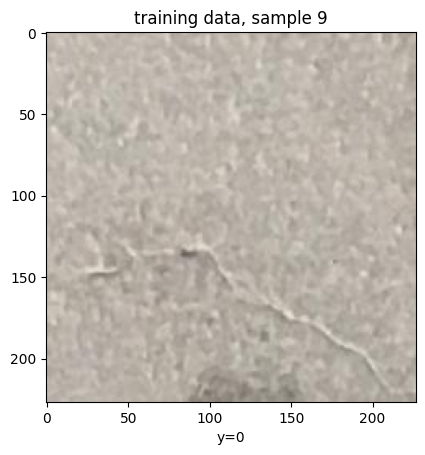

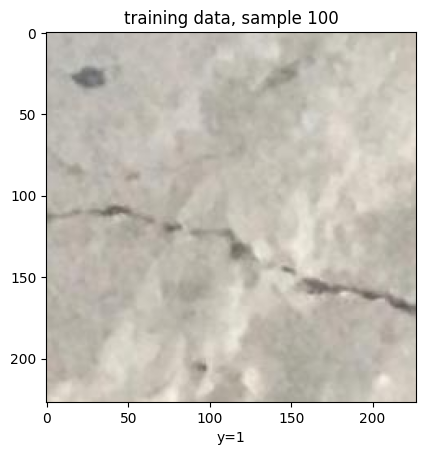

In [ ]:
dataset = Dataset(transform=None, train=True)
print(len(dataset))
samples = [9, 100]

for sample in (samples):
  plt.imshow(dataset[sample][0])
  plt.xlabel("y=" + str(dataset[sample][1].item()))
  plt.title("training data, sample {}".format(int(sample)))
  plt.show()

<h2 id="Question_5">Question 5</h2>
<b>Create a Dataset object <code>dataset</code> for the validation  data, use the following lines of code to print out the 16 th and  sample 103 (remember zero indexing)   </b>


40000


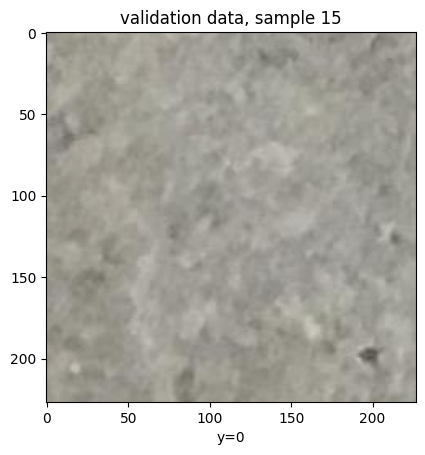

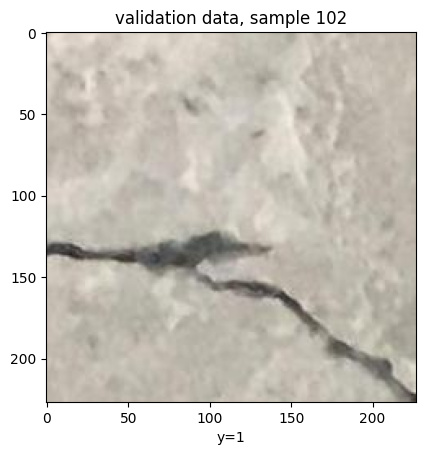

In [ ]:
dataset = Dataset(train=False)
print(len(dataset))
samples = [15, 102]

for sample  in samples:
    plt.imshow(dataset[sample][0])
    plt.xlabel("y="+str(dataset[sample][1].item()))
    plt.title("validation data, sample {}".format(int(sample)))
    plt.show()

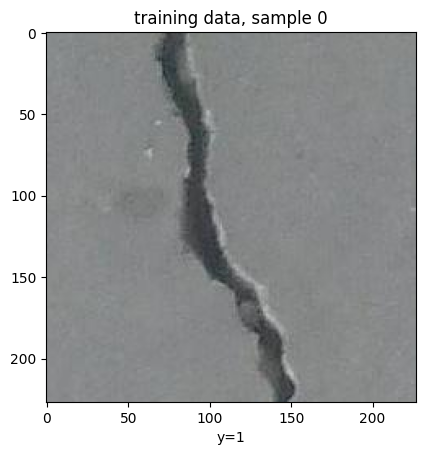

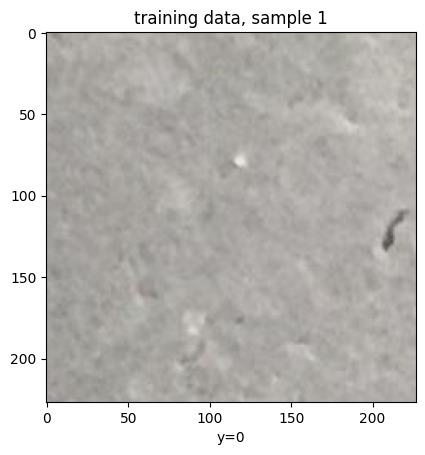

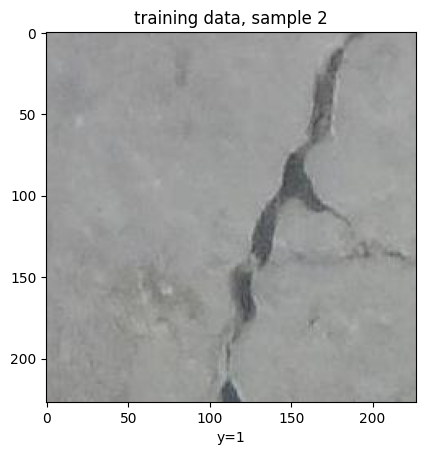

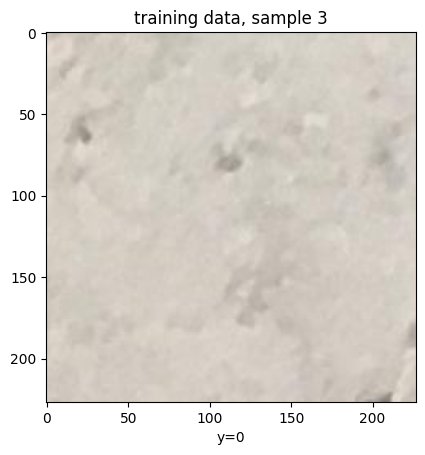

In [ ]:
dataset = Dataset(transform=None, train=False)
samples = [0, 1, 2, 3]
for sample in (samples):
  plt.imshow(dataset[sample][0])
  plt.xlabel("y=" + str(dataset[sample][1].item()))
  plt.title("training data, sample {}".format(int(sample)))
  plt.show()

<h1>Objective</h1><ul><li> How to use linear classifier in pytorch.</li></ul>


<h1>Linear  Classifier with PyTorch </h1>


<p>Before you use a  Deep neural network to solve the classification problem,  it 's a good idea to try and solve the problem with the simplest method. You will need the dataset object from the previous section.
In this lab, we solve the problem with a linear classifier.
 You will be asked to determine the maximum accuracy your linear classifier can achieve on the validation data for 5 epochs. We will give some free parameter values if you follow the instructions you will be able to answer the quiz. Just like the other labs there are several steps, but in this lab you will only be quizzed on the final result. </p>


<h2 id="auxiliary">Imports and Auxiliary Functions</h2>


The following are the libraries we are going to use for this lab:


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os
import glob
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
from torch import optim
import skillsnetwork

<h2 id="download_data">Download Data</h2>


In this section, you are going to download the data from IBM object storage using **skillsnetwork.prepare** command. <b>skillsnetwork.prepare</b> is a command that's used to download a zip file, unzip it and store it in a specified directory. Locally we store the data in the directory  **/content/sample_data**.


First, we download the file that contains the images:


In [ ]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", path = "/content/sample_data", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to 'sample_data'


<h2 id="data_class">Dataset Class</h2>


In this section, we will use the previous code to build a dataset class. As before, make sure the even samples are positive, and the odd samples are negative.  In this case, if the parameter <code>train</code> is set to <code>True</code>, use the first 10 000 samples as training data; otherwise, the last 10 000 samples will be used as validation data. Do not forget to sort your files so they are in the same order.  


**Note:** We are using the first 10,000 samples as our training data instead of the available 30,000 to decrease the training time of the model. If you want, you can train it yourself with all 30,000 samples just by modifying 2 lines in the following code chunk.


In [ ]:
class Dataset(Dataset):

    # Constructor
    def __init__(self,transform=None,train=True):
        directory="/content/sample_data"
        positive="Positive"
        negative="Negative"

        positive_file_path=os.path.join(directory,positive)
        negative_file_path=os.path.join(directory,negative)
        positive_files=[os.path.join(positive_file_path,file) for file in  os.listdir(positive_file_path) if file.endswith(".jpg")]
        positive_files.sort()
        negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
        negative_files.sort()
        number_of_samples=len(positive_files)+len(negative_files)
        self.all_files=[None]*number_of_samples
        self.all_files[::2]=positive_files
        self.all_files[1::2]=negative_files
        # The transform is goint to be used on image
        self.transform = transform
        #torch.LongTensor
        self.Y=torch.zeros([number_of_samples]).type(torch.LongTensor)
        self.Y[::2]=1
        self.Y[1::2]=0

        if train:
            self.all_files=self.all_files[0:30000] #Change to 30000 to use the full test dataset
            self.Y=self.Y[0:30000] #Change to 30000 to use the full test dataset
            self.len=len(self.all_files)
        else:
            self.all_files=self.all_files[30000:]
            self.Y=self.Y[30000:]
            self.len=len(self.all_files)

    # Get the length
    def __len__(self):
        return self.len

    # Getter
    def __getitem__(self, idx):


        image=Image.open(self.all_files[idx])
        y=self.Y[idx]


        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

<h2 id="trasform_Data_object">Transform Object and Dataset Object</h2>


Create a transform object, that uses the <code>Compose</code> function. First use the transform <code>ToTensor()</code> and followed by <code>Normalize(mean, std)</code>. The value for <code> mean</code> and <code>std</code> are provided for you.


In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
# transforms.ToTensor()
#transforms.Normalize(mean, std)
#transforms.Compose([])

transform =transforms.Compose([ transforms.ToTensor(), transforms.Normalize(mean, std)])

Create object for the training data  <code>dataset_train</code> and validation <code>dataset_val</code>. Use the transform object to convert the images to tensors using the transform object:


In [ ]:
dataset_train=Dataset(transform=transform,train=True)
dataset_val=Dataset(transform=transform,train=False)

We  can find the shape of the image:


In [ ]:
dataset_train[0][0].shape

torch.Size([3, 227, 227])

We see that it's a color image with three channels:


In [ ]:
size_of_image=3*227*227
size_of_image

154587

In [ ]:
torch.manual_seed(0)

<h2 id="Question"> Question <h2>


<b> Create a custom module for Softmax for two classes,called model. The input size should be the <code>size_of_image</code>, you should record the maximum accuracy achieved on the validation data for the different epochs. For example if the 5 epochs the accuracy was 0.5, 0.2, 0.64,0.77, 0.66 you would select 0.77.</b>


Train the model with the following free parameter values:


<b>Parameter Values</b>
   <li>learning rate:0.1 </li>
   <li>momentum term:0.1 </li>
   <li>batch size training:5</li>
   <li>Loss function:Cross Entropy Loss </li>
   <li>epochs:5</li>
   <li>set: torch.manual_seed(0)</li>


<b>Custom Module:</b>


In [ ]:
class Softmax(nn.Module):
    def __init__(self, in_size, out_size):
        super(Softmax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)

    def forward(self, x):
        out = self.linear(x)
        return out

<b>Model Object:</b>


In [ ]:
input_dim = 227*227*3
output_dim = 2
torch.manual_seed(0)
model = Softmax(input_dim, output_dim)

<b>Optimizer:</b>

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.1)

<b>Criterion:</b>


In [ ]:
criterion = nn.CrossEntropyLoss()

<b>Data Loader Training and Validation:</b>


In [ ]:
train_loader = DataLoader(dataset=dataset_train, batch_size=5)
val_loader = DataLoader(dataset=dataset_val, batch_size=5)

<b>Train Model with 5 epochs, should take 35 minutes: </b>

In [ ]:
n_epochs = 5

LOSS = []
ACC = []

total_loss = 0

# Calculate the correct input dimension based on image size
input_dim = 3 * 227 * 227  # Assuming images are 227x227 with 3 channels

for epoch in range(n_epochs):
    total_loss = 0
    for x, y in train_loader:
        optimizer.zero_grad()

        # Reshape the input tensor to the correct dimensions
        # The input to the model should have shape (batch_size, input_dim)
        yhat = model(x.view(-1, input_dim))

        loss = criterion(yhat, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(dataset_train)
    LOSS.append(avg_loss)

    correct = 0
    for x, y in val_loader:

        # Reshape the input tensor to the correct dimensions for validation as well
        # The input to the model should have shape (batch_size, input_dim)
        z = model(x.view(-1, input_dim))

        _, yhat = torch.max(z, 1)
        correct += (yhat == y).sum().item()  # Compare yhat and y directly for accuracy
    accuracy = correct / len(dataset_val)
    ACC.append(accuracy)  # Append to ACC, not apend

    print(f'Epoch: {epoch}, Train Loss: {avg_loss}, Test Accuracy: {accuracy}')

Epoch: 0, Train Loss: 192.27037846266168, Test Accuracy: 0.8132
Epoch: 1, Train Loss: 156.25717471454533, Test Accuracy: 0.7883
Epoch: 2, Train Loss: 145.76319724473296, Test Accuracy: 0.8289
Epoch: 3, Train Loss: 144.11901485796156, Test Accuracy: 0.8199
Epoch: 4, Train Loss: 138.0632172865807, Test Accuracy: 0.8226


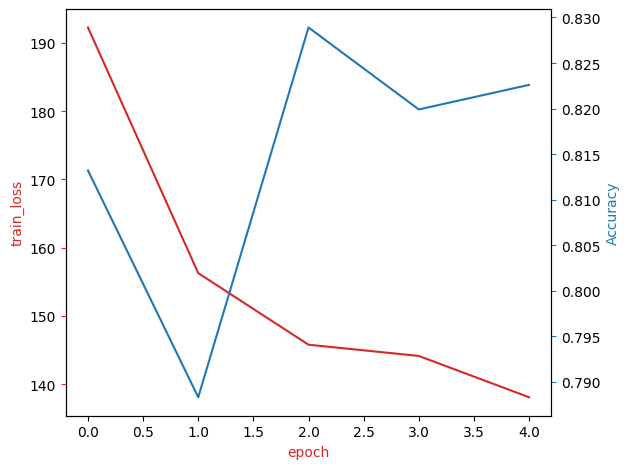

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.plot(LOSS, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('train_loss', color=color)
ax1.tick_params(axis='y', color=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.plot(ACC, color=color)
ax2.set_ylabel('Accuracy', color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

<h1><h1>Pre-trained-Models with PyTorch </h1>


In this lab, you will use pre-trained models to classify between the negative and positive samples; you will be provided with the dataset object. The particular pre-trained model will be resnet18; you will have three questions:
<ul>
<li>change the output layer</li>
<li> train the model</li>
<li>  identify  several  misclassified samples</li>
 </ul>
You will take several screenshots of your work and share your notebook.


<h2 id="download_data">Download Data</h2>


Download the dataset and unzip the files in your data directory, unlike the other labs, all the data will be deleted after you close  the lab, this may take some time:


In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip

--2025-01-20 18:44:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Positive_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2598656062 (2.4G) [application/zip]
Saving to: ‘Positive_tensors.zip’

Positive_tensors.zi 100%[===================>]   2.42G  27.4MB/s    in 90s     

2025-01-20 18:45:52 (27.5 MB/s) - ‘Positive_tensors.zip’ saved [2598656062/2598656062]



In [ ]:
!unzip -q Positive_tensors.zip

In [ ]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
!unzip -q Negative_tensors.zip

--2025-01-20 18:45:52--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/Negative_tensors.zip
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2111408108 (2.0G) [application/zip]
Saving to: ‘Negative_tensors.zip’

Negative_tensors.zi 100%[===================>]   1.97G  11.7MB/s    in 3m 3s   

2025-01-20 18:48:56 (11.0 MB/s) - ‘Negative_tensors.zip’ saved [2111408108/2111408108]



<h2 id="auxiliary">Imports and Auxiliary Functions</h2>


The following are the libraries we are going to use for this lab. The <code>torch.manual_seed()</code> is for forcing the random function to give the same number every time we try to recompile it.


In [ ]:
# These are the libraries will be used for this lab.
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import os
import glob
import h5py
torch.manual_seed(0)

In [ ]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd

<h2 id="data_class">Dataset Class</h2>


 This dataset class is essentially the same dataset you build in the previous section, but to speed things up, we are going to use tensors instead of jpeg images. Therefor for each iteration, you will skip the reshape step, conversion step to tensors and normalization step.


In [ ]:
class Dataset(Dataset):

  # Constructor
  def __init__(self, transform=None, train=True):
    directory = '/content'
    positive = 'Positive_tensors'
    negative = 'Negative_tensors'

    positive_files_path = os.path.join(directory, positive)
    negative_files_path = os.path.join(directory, negative)
    positive_files = [os.path.join(positive_files_path, file) for file in os.listdir(positive_files_path) if file.endswith('.pt')]
    negative_files = [os.path.join(negative_files_path, file) for file in os.listdir(negative_files_path) if file.endswith('.pt')]

    number_of_samples = len(positive_files) + len(negative_files)
    self.all_files = [None] * number_of_samples
    self.all_files[::2] = positive_files
    self.all_files[1::2] = negative_files
    self.transform = transform

    self.Y = torch.zeros([number_of_samples]).type(torch.LongTensor)
    self.Y[::2] = 1
    self.Y[1::2] = 0

    if train:
      self.all_files = self.all_files[0:30000]
      self.Y = self.Y[0:30000]
      self.len = len(self.all_files)

    else:
      self.all_files = self.all_files[30000:]
      self.Y = self.Y[30000:]
      self.len = len(self.all_files)

  # Get Length
  def __len__(self):
    return self.len

  # Getter
  def __getitem__(self, index):
    image = torch.load(self.all_files[index])
    y = self.Y[index]

    if self.transform:
      image = self.transform(image)

    return image, y

print("done")

done


We create two dataset objects, one for the training data and one for the validation data.


In [ ]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
composed = transforms.Compose(
    [
      transforms.Resize(224),
      # transforms.ToTensor(),
      transforms.Normalize(mean, std)
    ]
)
train_dataset = Dataset(transform=composed, train=True)
validation_dataset = Dataset(transform=composed, train=False)
print("done")

done


<h2 id="Question_1">Question 1</h2>


<b>Prepare a pre-trained resnet18 model :</b>


<b>Step 1</b>: Load the pre-trained model <code>resnet18</code> Set the parameter <code>pretrained</code> to true:


In [ ]:
# Step 1: Load the pre-trained model resnet18

# Type your code here
model = models.resnet18(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<b>Step 2</b>: Set the attribute <code>requires_grad</code> to <code>False</code>. As a result, the parameters will not be affected by training.


In [ ]:
for param in model.parameters():
  param.requires_grad = False

<code>resnet18</code> is used to classify 1000 different objects; as a result, the last layer has 1000 outputs.  The 512 inputs come from the fact that the previously hidden layer has 512 outputs.


<b>Step 3</b>: Replace the output layer <code>model.fc</code> of the neural network with a <code>nn.Linear</code> object, to classify 2 different classes. For the parameters <code>in_features </code> remember the last hidden layer has 512 neurons.


In [ ]:
model.fc = nn.Linear(512, 2)

In [ ]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

<h2 id="Question_2">Question 2: Train the Model</h2>


In this question you will train your, model:


<b>Step 1</b>: Create a cross entropy criterion function


In [ ]:
# Step 1: Create the loss function

# Type your code here
criterion = nn.CrossEntropyLoss()

<b>Step 2</b>: Create a training loader and validation loader object, the batch size should have 100 samples each.


In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=100)

print(train_loader)

<b>Step 3</b>: Use the following optimizer to minimize the loss


In [ ]:
optimizer = torch.optim.Adam([parameters for parameters in model.parameters() if parameters.requires_grad], lr=0.001)

**Complete the following code to calculate  the accuracy on the validation data for one epoch; this should take about 45 minutes. Make sure you calculate the accuracy on the validation data.**


In [ ]:
n_epochs = 1
loss_list = []
accuracy_list = []
correct = 0
N_test = len(validation_dataset)
N_train = len(train_dataset)
start_time = time.time()

# epochs
Loss = 0
start_time = time.time()

for epoch in range(n_epochs):
  for x, y in train_loader:
    print(x.shape)
    model.train()
    #clear gradient
    optimizer.zero_grad()
    #make a prediction
    z = model(x)
    # calculate loss
    loss = criterion(z, y)
    # calculate gradients of parameters
    loss.backward()
    # update parameters
    optimizer.step()
    loss_list.append(loss.data)

  correct = 0
  for x_test, y_test in validation_loader:
    # set model to eval
    model.eval()
    #make a prediction
    z = model(x_test)
    #find max
    _, label = torch.max(z.data, 1)
    #Calculate misclassified  samples in mini-batch
    correct += (label == y_test).sum().item()
  accuracy = correct/N_test
  accuracy_list.append(accuracy)

<ipython-input-65-b923af557304>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(self.all_files[index])


torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Size([100, 3, 224, 224])
torch.Si

In [ ]:
accuracy

0.9939

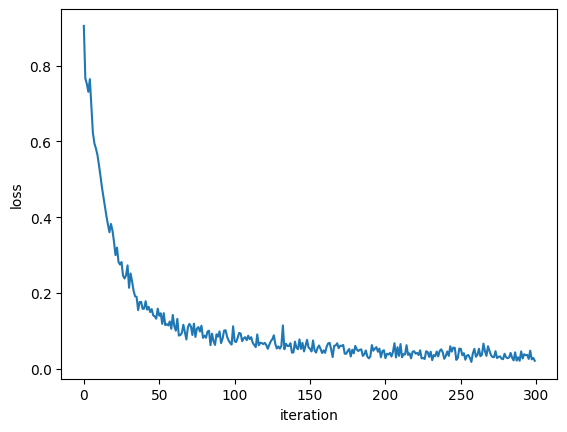

In [ ]:
plt.plot(loss_list)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

In [ ]:
model.eval()
count = 0
sample = 0

for x_test, y_test in validation_loader:
    z = model(x_test)
    _, yhat = torch.max(z.data, 1)

    for i in range(len(y_test)):
        sample += 1
        if yhat[i] != y_test[i]:
            count += 1
            print(f"sample {sample} predicted value: {yhat[i]}  actual value: {y_test[i]}")
            if count == 4:
                break
    if count == 4:
        break

<ipython-input-65-b923af557304>:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  image = torch.load(self.all_files[index])


sample 181 predicted value: 0  actual value: 1
sample 339 predicted value: 0  actual value: 1
sample 677 predicted value: 0  actual value: 1
sample 747 predicted value: 0  actual value: 1
